In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
data = pd.read_table("ex1data1.txt", header=None, sep=",")

print(data)

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


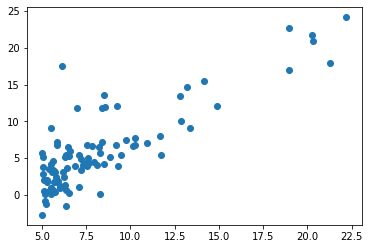

In [82]:
source = data.copy(deep=True)  # 深拷贝，保留一份原数据

x = data.iloc[:, 0]  # population
profit = data.iloc[:, 1]

plt.scatter(x, profit)

plt.show()

### 为每个样本都添加 X~0~=1 一项

In [84]:
m = 97  # m 是样本数

feature_names = ['x0', 'population']
x0 = pd.DataFrame(np.array([1] * m), columns=[feature_names[0]])
x = x0.assign(population = x)

# x['x0'] = x0

print(x, end="\n\n")

    x0  population
0    1      6.1101
1    1      5.5277
2    1      8.5186
3    1      7.0032
4    1      5.8598
..  ..         ...
92   1      5.8707
93   1      5.3054
94   1      8.2934
95   1     13.3940
96   1      5.4369

[97 rows x 2 columns]



### 设置 θ 初始值

In [74]:
theta = np.zeros(2).reshape(2, 1)
iterations = 1500
alpha = 0.01

print("θ 初始值")
print(theta)

θ 初始值
[[0.]
 [0.]]


## h(x)

In [75]:
def h_function(x, theta):
    return np.dot(x, theta)



h = h_function(x, theta)

print(h, end="\n\n")

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]



## 代价函数 J(θ)

In [76]:
# h 目前由于两个参数全为 0 ，所以 h 全为 0
# y 即为实际结果
# 设 present as p


def cost(hypothesis, y, sample_amount):
    diff_square = np.power(hypothesis-y, 2)
    sumup = np.sum(diff_square, axis=0)
    return np.true_divide(sumup, 2*sample_amount)


y = profit.to_numpy().reshape(97, 1)

J = cost(h, y, m)

print(J)

[32.07273388]


## 梯度下降算法

In [77]:
# theta : θ，代价函数 J 的自变量，是一个向量，θ 与 x 一一对应，每个 θ 都是 特征 x_j 的参数
# feature_names : (python 列表)；特征 x 存储在 DataFrame 中，feature_names 就是每列特征的标题 (列名)
# feature_x : 即存储特征值的 DataFrame
# hypothesis : (numpy 二维数组，每个预测值一行)；每次改完 θ 后计算出来的一组预测值
# y : (numpy 二维数组，每个值一行)；真实值，实际值
# alpha : 学习率
# sample_amount : 样本数，计算过程需要

def gradient_descent_for_theta(theta, feature_names, x_dataframe, hypothesis, y, alpha, sample_amount):
    feature_amount = theta.shape[0]  # θ 的数量 （等于特征 x 的数量）
    new_theta = np.zeros(theta.shape)
    
    for j in range(feature_amount):
        xj = x_dataframe[feature_names[j]].to_numpy().reshape(sample_amount, 1)
#         diff_by_xj = (hypothesis-y) * xj
#         sumup = np.sum(diff_by_xj, axis=0)
        sumup = np.sum((hypothesis-y) * xj, axis=0)
        new_theta[j] = theta[j] - np.true_divide(sumup*alpha, sample_amount)
    
    return new_theta

# print(x[0].to_numpy().reshape(97, 1), end="\n\n")
# print(theta0(theta, feature_names, x, h, y, alpha, m), end="\n\n")
theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
print(theta, end="\n\n")

[[0.05839135]
 [0.6532885 ]]



In [79]:
h = h_function(x, theta)
J = cost(h, y, m)

print(J, end="\n\n")

[6.73719046]



第三次计算

In [80]:
theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
h = h_function(x, theta)
J = cost(h, y, m)

print(J, end="\n\n")

[5.93159357]



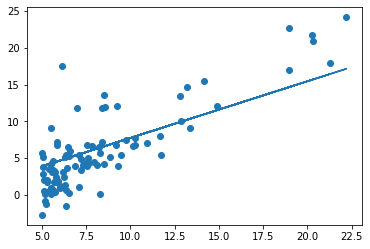

In [85]:
plt.scatter(x['population'], profit)
plt.plot(x['population'], h)

plt.show()

第四次计算

In [86]:
theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
h = h_function(x, theta)
J = cost(h, y, m)

print(J, end="\n\n")

[5.90115471]



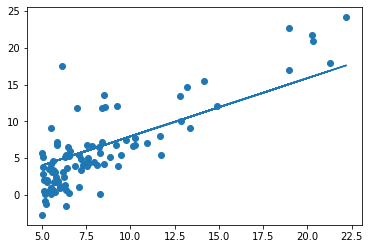

In [87]:
plt.scatter(x['population'], profit)
plt.plot(x['population'], h)

plt.show()

第五次计算

[5.89522859]



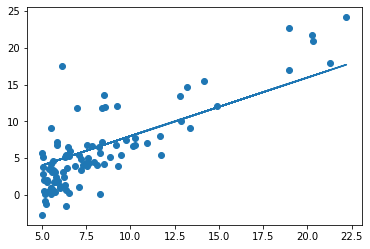

In [88]:
theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
h = h_function(x, theta)
J = cost(h, y, m)

print(J, end="\n\n")

plt.scatter(x['population'], profit)
plt.plot(x['population'], h)

plt.show()

第六次计算

[5.89009494]



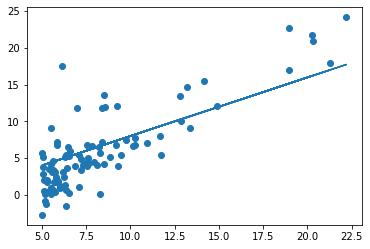

In [89]:
theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
h = h_function(x, theta)
J = cost(h, y, m)

print(J, end="\n\n")

plt.scatter(x['population'], profit)
plt.plot(x['population'], h)

plt.show()

第七次计算

[5.88500416]



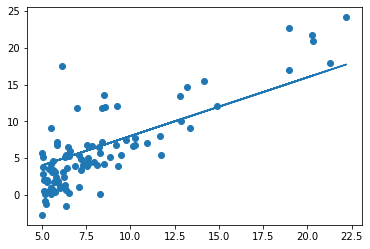

In [90]:
theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
h = h_function(x, theta)
J = cost(h, y, m)

print(J, end="\n\n")

plt.scatter(x['population'], profit)
plt.plot(x['population'], h)

plt.show()

第八次计算

[5.87993248]



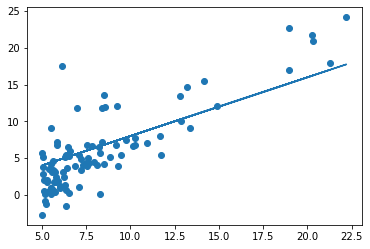

In [91]:
theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
h = h_function(x, theta)
J = cost(h, y, m)

print(J, end="\n\n")

plt.scatter(x['population'], profit)
plt.plot(x['population'], h)

plt.show()

迭代运算 1500 次

[4.48316083]



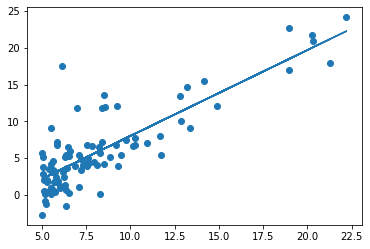

In [97]:
for i in range(1500):
    theta = gradient_descent_for_theta(theta, feature_names, x, h, y, alpha, m)
    h = h_function(x, theta)
    J = cost(h, y, m)



print(J, end="\n\n")

plt.scatter(x['population'], profit)
plt.plot(x['population'], h)

plt.show()

In [98]:
print(theta)

[[-3.63503851]
 [ 1.16683924]]


## 线性回归最优解为：h = -3.635 + 1.167x~1~
此处 x~1~ 为人口 population 特征值

### ..................................................

In [96]:
z = np.zeros(theta.shape)

print(z, end="\n\n")

[[0.]
 [0.]]



In [31]:
a = np.array([[1, 2], [3, 4], [5, 6]])

s = a.shape
print(s, end="\n\n")
print(s[0], end="\n\n")

(3, 2)

3

